In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from random import sample
from wordcloud import WordCloud


In [2]:
file_name = 'training.1600000.processed.noemoticon.csv'
column = ('target','id','data','flag','user','text')
df = pd.read_csv(file_name, names=column)
df.head()

,target,id,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
NEGATIVE = 0
POSITIVE = 4

df_neg = df[df['target'] == NEGATIVE].copy()
df_pos = df[df['target'] == POSITIVE].copy()

neg_text = ' '.join(df_neg['text'])
pos_text = ' '.join(df_pos['text'])

# Cleaning Texts

In [4]:
# 아래에서 사용할 generate_with_frequencies는 stopword 제거가 안 됨 -> nltk 사용

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_text(text):
    cleaned_text = text.lower()
    cleaned_text = re.sub(r'@\w*', '', cleaned_text) # @ 언급 제거
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text) # 특수 문자 제거
    filtered_words = [word for word in cleaned_text.split() if word not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

neg_text_cleaned = clean_text(neg_text)
pos_text_cleaned = clean_text(pos_text)

# Counting Frequency of Words

In [6]:
neg_words_frequency = Counter(neg_text_cleaned.split())
pos_words_frequency = Counter(pos_text_cleaned.split())

# Sampling

In [7]:
neg_sample = dict(sample(list(neg_words_frequency.items()), int(len(neg_words_frequency) * 0.1)))
pos_sample = dict(sample(list(pos_words_frequency.items()), int(len(pos_words_frequency) * 0.1)))

# Generating WordCloud

In [8]:
max_words = 200

neg_wordcloud = WordCloud(max_words=max_words).generate_from_frequencies(neg_sample)
pos_wordcloud = WordCloud(max_words=max_words).generate_from_frequencies(pos_sample)

# Plotting

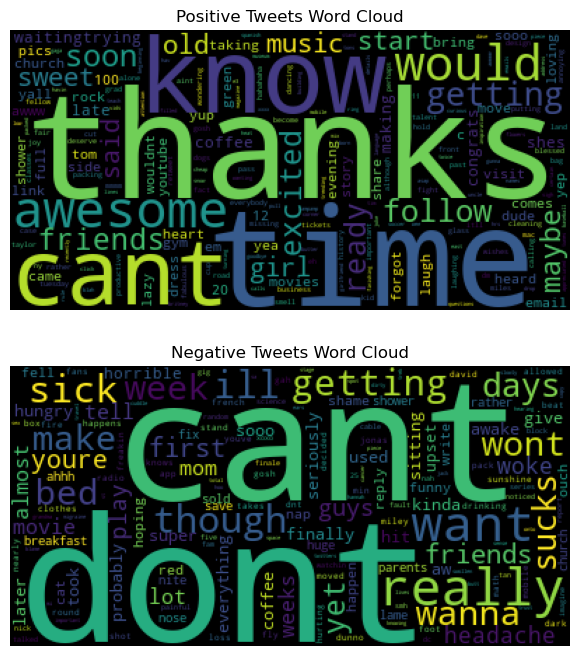

In [9]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.imshow(pos_wordcloud)
plt.title('Positive Tweets Word Cloud')
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(neg_wordcloud)
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()